# Steps 

    1. Getting and setting up the data.
    2. Visualizing current data.
    3. The mathematics behind the Least Squares Method.
    4. Using Numpy for a Univariate Linear Regression.
    5. Getting the error.
    6. Using scikit learn to implement a multivariate regression.
    7. Using Training and Validation.  
    8. Predicting Prices
    9. Residual Plots

# Step 1

In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
from sklearn.datasets import load_boston

In [7]:
# Grab boston dataset from the scikit learn
boston = load_boston()

In [9]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Step 2 - Visualize

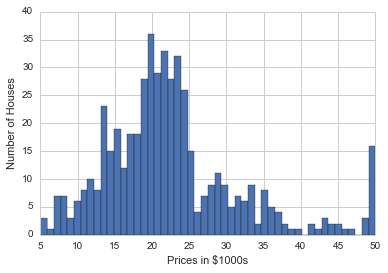

In [10]:
# Histogram of Prices
# target is specific to boston dataset
plt.hist(boston.target, bins = 50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

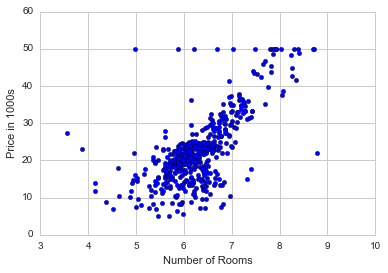

In [12]:
# single feature vs the targe 
# housing price vs the average room per dwelling

plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price in 1000s')
plt.xlabel('Number of Rooms')

In [13]:
# Grab Data with pandas
boston_df = DataFrame(boston.data)
# set columns names fron boston datset
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
# add a new columb to demonstrate the price
boston_df['Price']=boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


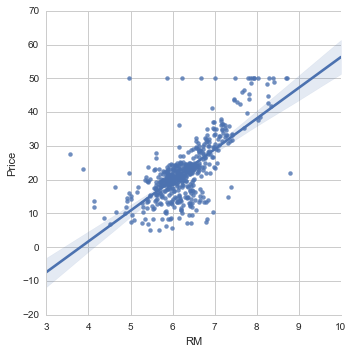

In [15]:
# linear fit room vs the price

sns.lmplot('RM','Price', data=boston_df)

# Step 3: The mathematics LSM
https://www.youtube.com/watch?v=Qa2APhWjQPc



# Step 4 : Using Numpy for a Univariate Linear Regression

In [25]:
X = boston_df.RM  #Room Values
X.shape
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, dtype: float64

In [26]:
X = np.vstack(boston_df.RM)

In [27]:
X.shape
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [21]:
Y = boston_df.Price

In [22]:
Y.shape

(506,)

In [23]:
# It is required  y =mx +c, y=Ap, A =[x,1],p =[m b] we need A=[x,1] matrix

In [28]:
# in the form of[X,1] , for every value in x set ast [x,1]

X = np.array([[value,1] for value in X])

In [29]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [32]:
# Best Fit Values with p =[m b ]

m, b = np.linalg.lstsq(X,Y)[0] #care about only first index


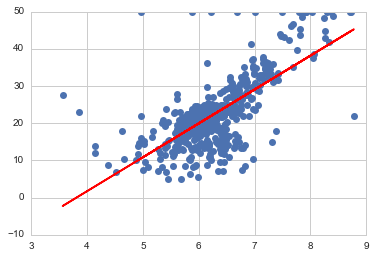

In [35]:
# Plot original plot

plt.plot(boston_df.RM,boston_df.Price,'o')
# plot best fit line

x = boston_df.RM
plt.plot(x,m*x + b,'r',label='Best Fit Line')  #y =mx +c

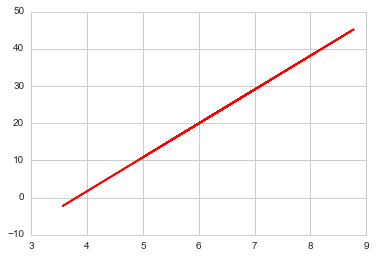

# Step 5 : Get the error and do the multi variate regression

In [37]:
result = np.linalg.lstsq(X,Y)
#Error are stored in index 1
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print ('RMS Error is %.2f'%rmse)

RMS Error is 6.60


# Approx to std dev, the price of house wont vary more than 2 times the RMSE value for 95% of the time
 i.e 6.60 * 2 in thousands

 68–95–99.7 rule


# Step 6: scikit learn multi variable regression

In [40]:
# scikit learn regression as estimator. 
from sklearn.linear_model import LinearRegression

In [42]:
lreg = LinearRegression()

In [43]:
# lreg.fit()
# lreg.predict()
# lreg.score() - coefficient of determination (R^2)

In [44]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [45]:
# linear regresstion
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print'Estimated intercept coefficient is %.2f '%lreg.intercept_
print'The number of coefficient used is %.2f'%len(lreg.coef_)

Estimated intercept coefficient is 36.49 
The number of coefficient used is 13.00


In [47]:
# Show
# create coeffdf based on dataframe columns
coeff_df = DataFrame(boston_df.columns)

# rename that column as Features
coeff_df.columns = ['Features']

# newcolumn
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df


,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


# Step 7:Training and Validation

In [49]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [50]:
boston_df.Price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, dtype: float64

In [53]:
import sklearn
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [54]:
# output
print X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

(379, 2) (127, 2) (379,) (127,)


# Step 8 Predicting the house prices

In [55]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# run prediction on x train and x test

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [59]:
# take means squared error

print 'Fit a model X_train and calculate the MSE with Y_train : %.2f '% np.mean((Y_train-pred_train)**2)  #this is the length of d line
print 'Fit a model X_train and calculate the MSE with X_test and Y_test : %.2f '% np.mean((Y_test-pred_test)**2)



Fit a model X_train and calculate the MSE with Y_train : 44.21 
Fit a model X_train and calculate the MSE with X_test and Y_test : 42.54 


# Step 9: Residual plot to visualize 
Residual = Observed value - predicted value  i.e pred_train-Y_train
More here http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis

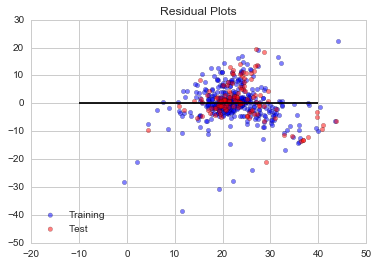

In [62]:
train = plt.scatter(pred_train,(pred_train- Y_train),c ='b', alpha =0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha =0.5)

plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')